In [1]:
import pandas as pd
import numpy as np
import pickle
import matplotlib.pyplot as plt
from matplotlib_venn import venn2
from matplotlib_venn import venn3

event_spikes = pickle.load(open('event_and_pre_event_spikes_df.pkl', 'rb'))

# Identify 'Pre-event' and 'Event' columns
pre_event_cols = [col for col in event_spikes.columns if col.startswith('Pre-event')]
event_cols = [col for col in event_spikes.columns if col.startswith('Event') and col not in ['Event name', 'Event number']]

# Calculate 'Pre-event M' and 'Pre-event Std' for each row
pre_event_mean = event_spikes[pre_event_cols].mean(axis=1)
pre_event_std = event_spikes[pre_event_cols].std(axis=1).round(3)

# Normalize 'Event' columns based on 'Pre-event M' and 'Pre-event Std'
normalized_event_cols = event_spikes[event_cols].apply(lambda x: (x - pre_event_mean) / pre_event_std, axis=0)
normalized_event_cols = normalized_event_cols.replace([np.inf, -np.inf], np.nan)  # Handle division by zero by replacing infinities with NaN

# Calculate 'Event Z-Score' for each row
event_z_score = normalized_event_cols.mean(axis=1)

# Creating the final DataFrame with the calculated columns at the end
event_spikes_zscores_final = pd.concat([event_spikes, normalized_event_cols, pre_event_mean.rename('Pre-event M'), pre_event_std.rename('Pre-event Std'), event_z_score.rename('Event Z-Score')], axis=1)

event_spikes_zscores_final

,Recording,Event name,Event number,Unit number,Pre-event timebin 1,Pre-event timebin 2,Pre-event timebin 3,Pre-event timebin 4,Pre-event timebin 5,Pre-event timebin 6,...,Event timebin 94,Event timebin 95,Event timebin 96,Event timebin 97,Event timebin 98,Event timebin 99,Event timebin 100,Pre-event M,Pre-event Std,Event Z-Score
0,20230612_101430_standard_comp_to_training_D1_s...,rewarded,1,85,1.28,1.28,1.28,1.28,1.28,1.28,...,-6.787629,-6.787629,-7.200000,-7.200000,-7.200000,-7.200000,-7.200000,1.4184,0.097,-3.942268
1,20230612_101430_standard_comp_to_training_D1_s...,rewarded,2,85,0.12,0.12,0.12,0.12,0.12,0.12,...,5.728571,5.728571,5.728571,5.728571,5.728571,5.728571,5.728571,0.0796,0.028,0.685714
2,20230612_101430_standard_comp_to_training_D1_s...,rewarded,3,85,0.12,0.12,0.12,0.12,0.12,0.12,...,-2.419512,-2.419512,-2.419512,-2.419512,-2.419512,-2.419512,-2.419512,0.2192,0.041,-1.102439
3,20230612_101430_standard_comp_to_training_D1_s...,rewarded,4,85,0.24,0.24,0.24,0.24,0.24,0.24,...,-6.066667,-6.066667,-6.066667,-6.066667,-6.066667,-6.066667,-6.066667,0.2292,0.018,-2.777778
4,20230612_101430_standard_comp_to_training_D1_s...,rewarded,5,85,0.20,0.20,0.20,0.20,0.20,0.20,...,-3.385714,-3.385714,-3.385714,-3.385714,-3.385714,-3.385714,-3.385714,0.1748,0.028,-3.571429
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10015,20230625_112913_standard_comp_to_both_rewarded...,both_rewarded,16,11,0.76,0.76,0.76,0.72,0.72,0.72,...,-4.691304,-4.691304,-4.691304,-4.691304,-4.691304,-4.691304,-4.691304,0.8716,0.092,-0.321739
10016,20230625_112913_standard_comp_to_both_rewarded...,both_rewarded,17,11,0.16,0.16,0.16,0.16,0.16,0.16,...,21.556757,21.556757,22.637838,22.637838,22.637838,22.637838,22.637838,0.1624,0.037,6.497297
10017,20230625_112913_standard_comp_to_both_rewarded...,both_rewarded,18,11,0.08,0.08,0.08,0.08,0.08,0.08,...,4.175000,4.175000,4.175000,4.175000,4.175000,4.175000,4.175000,0.1064,0.032,2.000000
10018,20230625_112913_standard_comp_to_both_rewarded...,both_rewarded,19,11,0.04,0.04,0.04,0.04,0.04,0.04,...,3.044706,3.044706,3.044706,3.044706,3.044706,3.044706,3.044706,0.1012,0.085,2.564706


In [2]:
def custom_aggregate(z_scores):
    if len(z_scores) < 2:
        return '< 2 events'
    else:
        return z_scores.mean()

# Group by 'Recording', 'Event name', and 'Unit number', then apply the custom aggregation function
zscore_df = event_spikes_zscores_final.groupby(['Recording', 'Event name', 'Unit number'])['Event Z-Score'].apply(custom_aggregate).reset_index()

# Rename the column from the aggregation result to 'Z-score'
zscore_df.rename(columns={'Event Z-Score': 'Z-score'}, inplace=True)

zscore_df

,Recording,Event name,Unit number,Z-score
0,20230612_101430_standard_comp_to_training_D1_s...,lose,2,-1.539897
1,20230612_101430_standard_comp_to_training_D1_s...,lose,5,0.663624
2,20230612_101430_standard_comp_to_training_D1_s...,lose,13,1.363285
3,20230612_101430_standard_comp_to_training_D1_s...,lose,17,-0.807436
4,20230612_101430_standard_comp_to_training_D1_s...,lose,19,-1.596648
...,...,...,...,...
797,20230625_112913_standard_comp_to_both_rewarded...,win,60,1.927347
798,20230625_112913_standard_comp_to_both_rewarded...,win,77,1.815513
799,20230625_112913_standard_comp_to_both_rewarded...,win,85,2.909794
800,20230625_112913_standard_comp_to_both_rewarded...,win,99,-2.119610


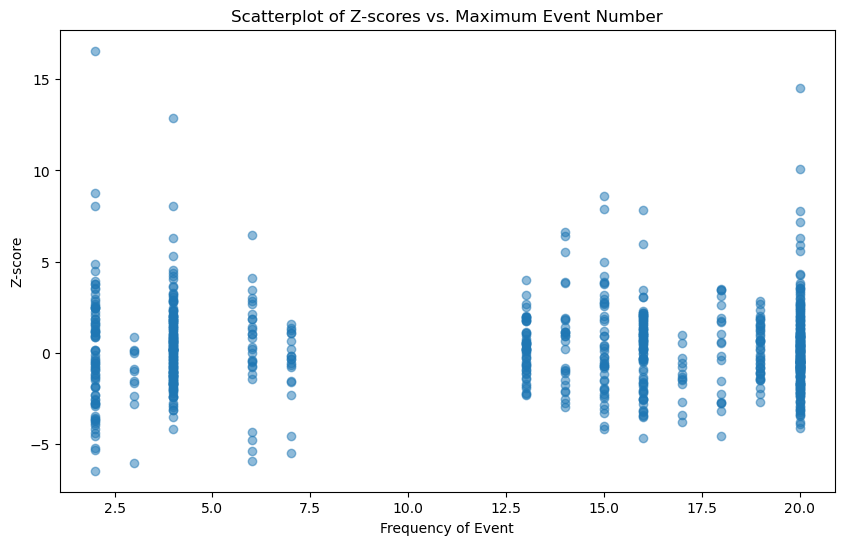

In [3]:
# Step 1: Find the maximum 'Event number' for each 'Recording' and 'Event name'
max_event_numbers = event_spikes_zscores_final.groupby(['Recording', 'Event name'])['Event number'].max().reset_index()
max_event_numbers.rename(columns={'Event number': 'Max Event number'}, inplace=True)

# Step 2: Merge this max event number data with the zscore_df
merged_df = pd.merge(zscore_df, max_event_numbers, on=['Recording', 'Event name'], how='left')

# Step 3: Plot the scatterplot
plt.figure(figsize=(10, 6))
plt.scatter(merged_df['Max Event number'], merged_df['Z-score'], alpha=0.5)
plt.title('Scatterplot of Z-scores vs. Maximum Event Number')
plt.xlabel('Frequency of Event')
plt.ylabel('Z-score')
# plt.grid(True)
plt.show()

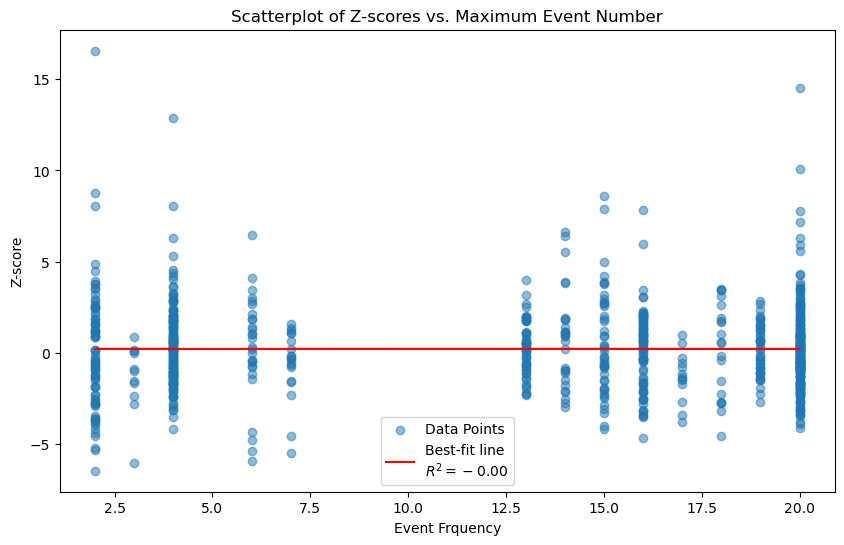

In [4]:
max_event_numbers = event_spikes_zscores_final.groupby(['Recording', 'Event name'])['Event number'].max().reset_index()
max_event_numbers.rename(columns={'Event number': 'Max Event number'}, inplace=True)

# Step 2: Merge this max event number data with the zscore_df
merged_df = pd.merge(zscore_df, max_event_numbers, on=['Recording', 'Event name'], how='left')

# Remove any NaN values that might affect correlation and regression analysis
merged_df.dropna(inplace=True)

# Calculate Pearson correlation coefficient
correlation_coef = np.corrcoef(merged_df['Max Event number'], merged_df['Z-score'])[0, 1]

# Fit line (polynomial of degree 1 i.e., linear)
fit = np.polyfit(merged_df['Max Event number'], merged_df['Z-score'], deg=1)
fit_fn = np.poly1d(fit)

# Step 3: Plot the scatterplot and best-fit line
plt.figure(figsize=(10, 6))
plt.scatter(merged_df['Max Event number'], merged_df['Z-score'], alpha=0.5, label='Data Points')
plt.plot(merged_df['Max Event number'], fit_fn(merged_df['Max Event number']), 'r-', label=f'Best-fit line\n$R^2 = {correlation_coef:.2f}$')

plt.title('Scatterplot of Z-scores vs. Maximum Event Number')
plt.xlabel('Event Frquency')
plt.ylabel('Z-score')
# plt.grid(True)
plt.legend()
plt.show()

Null values in Max Event number: 0
Null values in Z-score: 0

Statistics for Max Event number:
 count    802.000000
mean      12.493766
std        6.997634
min        2.000000
25%        4.000000
50%       15.000000
75%       20.000000
max       20.000000
Name: Max Event number, dtype: float64

Statistics for Z-score:
 count    802.000000
mean       0.206776
std        2.381829
min       -6.475928
25%       -1.243918
50%        0.133238
75%        1.455971
max       16.569048
Name: Z-score, dtype: float64


C:\Users\short\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\short\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


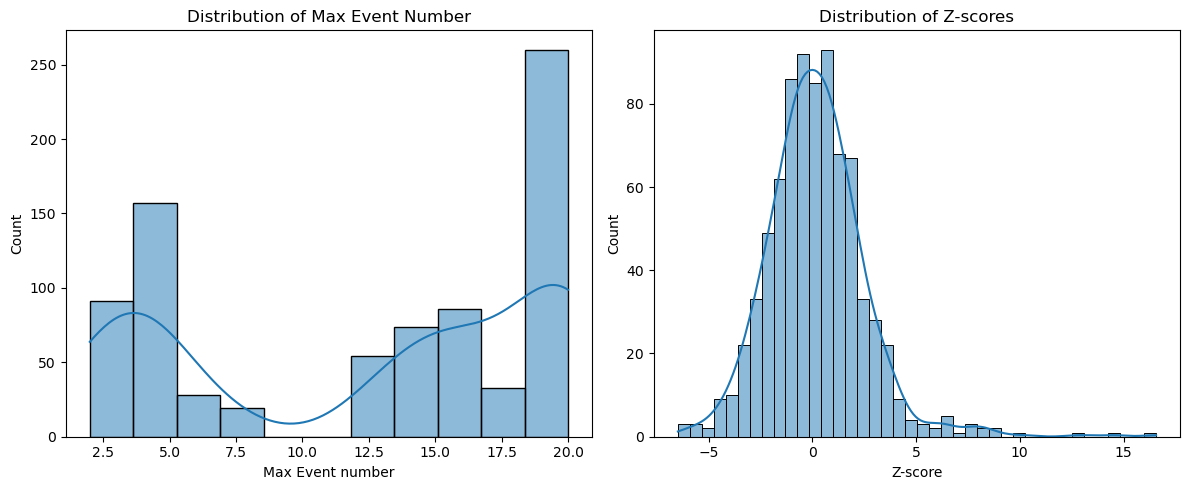

C:\Users\short\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\short\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


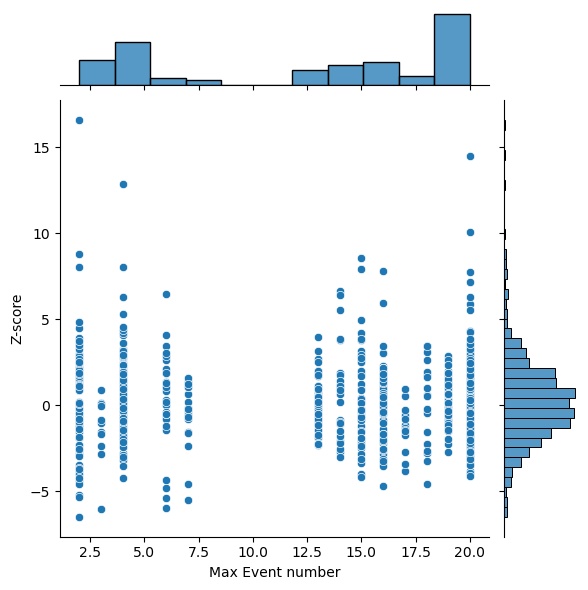


Correlation matrix:
                  Max Event number   Z-score
Max Event number          1.000000 -0.000269
Z-score                  -0.000269  1.000000


In [5]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Check for any null values in the important columns
print("Null values in Max Event number:", merged_df['Max Event number'].isnull().sum())
print("Null values in Z-score:", merged_df['Z-score'].isnull().sum())

# Basic statistics of these columns
print("\nStatistics for Max Event number:\n", merged_df['Max Event number'].describe())
print("\nStatistics for Z-score:\n", merged_df['Z-score'].describe())

# Plotting the distribution of 'Max Event number' and 'Z-score'
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.histplot(merged_df['Max Event number'], kde=True)
plt.title('Distribution of Max Event Number')

plt.subplot(1, 2, 2)
sns.histplot(merged_df['Z-score'], kde=True)
plt.title('Distribution of Z-scores')

plt.tight_layout()
plt.show()

# Scatter plot to visually inspect the relationship
sns.jointplot(x='Max Event number', y='Z-score', data=merged_df, kind="scatter")
plt.show()

# Correlation matrix for a numerical check
print("\nCorrelation matrix:")
print(merged_df[['Max Event number', 'Z-score']].corr())

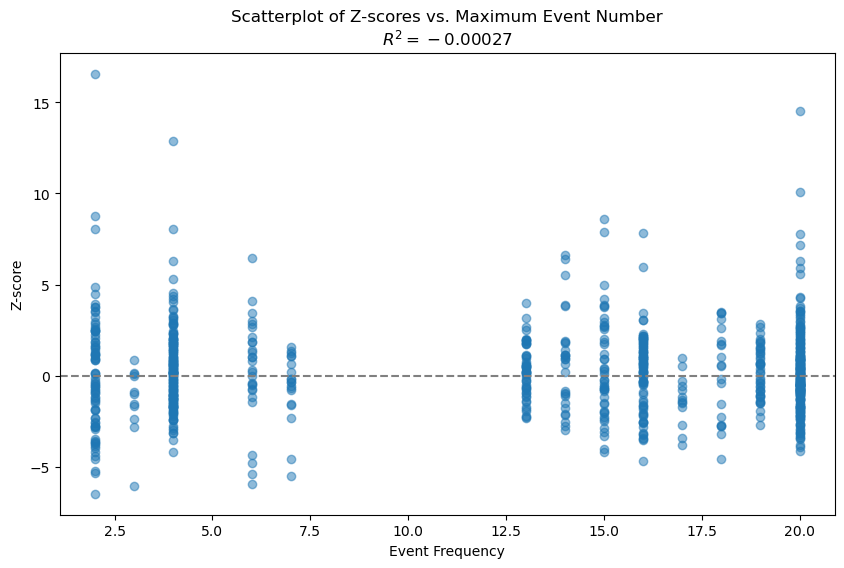

In [6]:
import matplotlib.pyplot as plt
import numpy as np

# Step 2: Merge this max event number data with the zscore_df
merged_df = pd.merge(zscore_df, max_event_numbers, on=['Recording', 'Event name'], how='left')

# Remove any NaN values that might affect correlation and regression analysis
merged_df.dropna(inplace=True)

# Calculate Pearson correlation coefficient
correlation_coef = np.corrcoef(merged_df['Max Event number'], merged_df['Z-score'])[0, 1]

# Step 3: Plot the scatterplot without the best-fit line
plt.figure(figsize=(10, 6))
plt.scatter(merged_df['Max Event number'], merged_df['Z-score'], alpha=0.5, label='Data Points')

# Add a horizontal dashed line at y=0
plt.axhline(y=0, color='gray', linestyle='--')

plt.title(f'Scatterplot of Z-scores vs. Maximum Event Number\n$R^2 = {correlation_coef:.5f}$')
plt.xlabel('Event Frequency')
plt.ylabel('Z-score')

plt.show()
# plt.savefig('ZScore_Scatterplot.png', bbox_inches='tight')

C:\Users\short\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


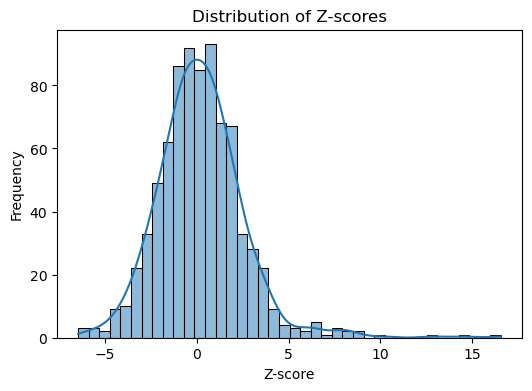

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plotting the distribution of 'Z-score'
plt.figure(figsize=(6, 4))  # Adjust size as needed
sns.histplot(merged_df['Z-score'], kde=True)
plt.title('Distribution of Z-scores')
plt.xlabel('Z-score')
plt.ylabel('Frequency')

# Save the plot to a file
plt.show()
# plt.savefig('ZScore_Histogram.png', dpi=300)  # dpi can be adjusted based on required resolution

C:\Users\short\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


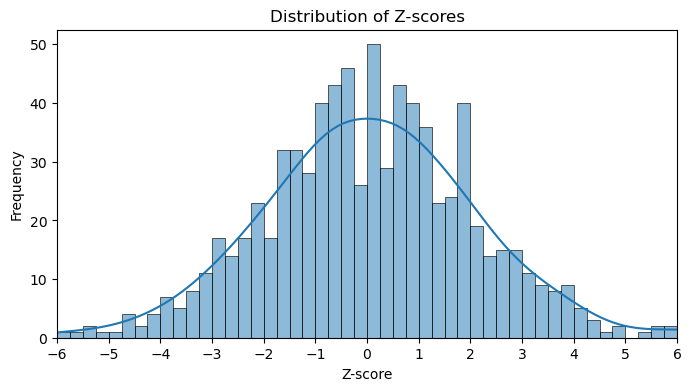

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plotting the distribution of 'Z-score'
plt.figure(figsize=(8, 4))  # Adjust size as needed
sns.histplot(merged_df['Z-score'], kde=True, binwidth=0.25, binrange=(-6, 6))
plt.title('Distribution of Z-scores')
plt.xlabel('Z-score')
plt.ylabel('Frequency')
plt.xlim(-6, 6)  # Limiting the x-axis to focus from -6 to 6

# Setting x-axis ticks to show every integer from -6 to 6
plt.xticks(range(-6, 7))

# Save the plot to a file
plt.show()
# plt.savefig('ZScore_Histogram.png', dpi=300)  # dpi can be adjusted based on required resolution

C:\Users\short\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


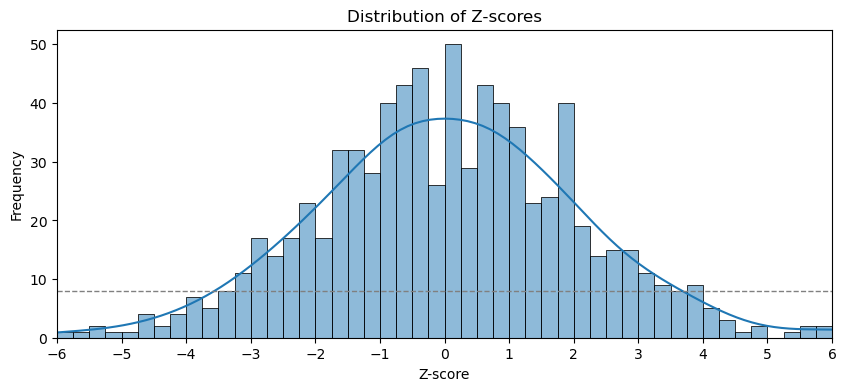

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plotting the distribution of 'Z-score'
plt.figure(figsize=(10, 4))  # Adjust size as needed
sns.histplot(merged_df['Z-score'], kde=True, binwidth=0.25, binrange=(-6, 6))
plt.title('Distribution of Z-scores')
plt.xlabel('Z-score')
plt.ylabel('Frequency')
plt.xlim(-6, 6)  # Limiting the x-axis to focus from -6 to 6
plt.xticks(range(-6, 7))  # Setting x-axis ticks

# Draw a horizontal light dashed line at y=8
plt.axhline(y=8, color='gray', linestyle='--', linewidth=1)

# Save the plot to a file
plt.show()
# plt.savefig('ZScore_Histogram_Zoomed.png', dpi=300)  # dpi can be adjusted based on required resolution

C:\Users\short\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


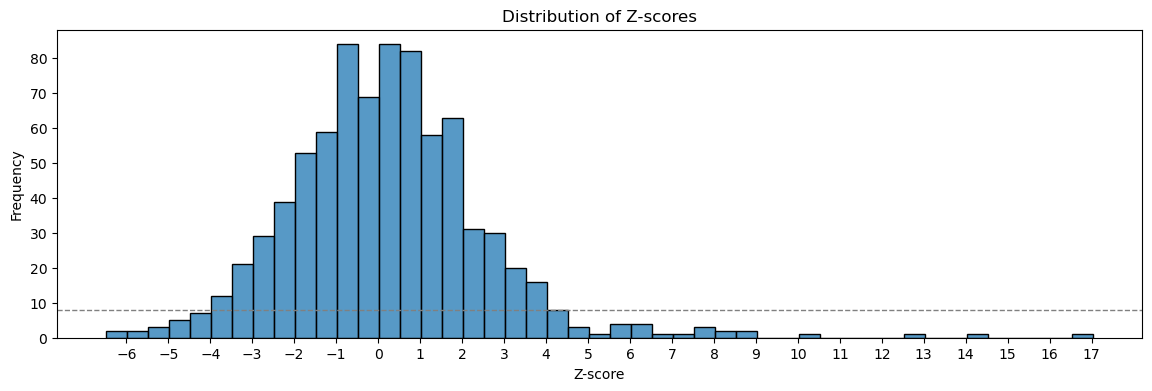

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plotting the distribution of 'Z-score'
plt.figure(figsize=(14, 4))  # Adjust size as needed
sns.histplot(merged_df['Z-score'], kde=False, binwidth=0.5)
plt.title('Distribution of Z-scores')
plt.xlabel('Z-score')
plt.ylabel('Frequency')
# plt.xlim(-6, 6)  # Limiting the x-axis to focus from -6 to 6
plt.xticks(range(-6, 18))  # Setting x-axis ticks

# Draw a horizontal light dashed line at y=8
plt.axhline(y=8, color='gray', linestyle='--', linewidth=1)

# Save the plot to a file
plt.show()
# plt.savefig('ZScore_Histogram_Zoomed2.png', dpi=300)  # dpi can be adjusted based on required resolution

C:\Users\short\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


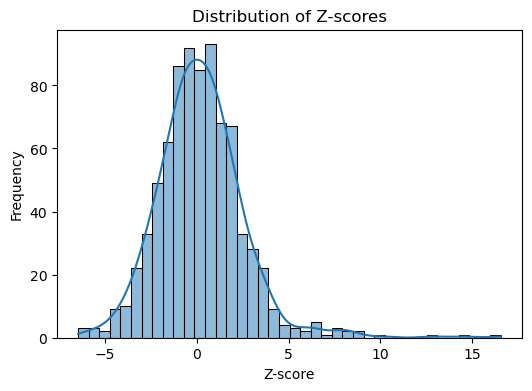

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plotting the distribution of 'Z-score'
plt.figure(figsize=(6, 4))  # Adjust size as needed
sns.histplot(merged_df['Z-score'], kde=True)
plt.title('Distribution of Z-scores')
plt.xlabel('Z-score')
plt.ylabel('Frequency')

# Save the plot to a file
plt.show()
# plt.savefig('ZScore_Histogram.png', dpi=300)  # dpi can be adjusted based on required resolution